# Inference and Visualization Tutorial

Welcome to the inference and visualization notebook! At this point, you should have a trained model and tiles to run inference. In this notebook we will run inference on a slide and visualize the results. Here are the steps we will review:

- Run inference with a trained model.
- Visualize the inference results
  - (optional) Add the test slide to Digital Slide Archive (DSA)
  - Generate heatmaps
  - View the heatmap thumbnails

## Run inference with a trained model

Often tissue-based analysis on whole slide images benefit from annotations provided by expert pathologists. However, having pathologists annotate 1000s of slides is very time consuming and expensive. To overcome this bottleneck, it is common to have pathologist annotate a subset of the slides, and use that dataset to train a model. This model is then used to label the rest of the dataset.

In the model training notebook, we trained a ResNet-18 model on a subset of our slides with the annotated regions and labels. We will now use this trained model and the prepared tiles from the test slide to run the inference step.

In [5]:
%%bash

infer_tiles --help

Usage: infer_tiles [OPTIONS]

Options:
  -a, --app_config TEXT         application configuration yaml file. See
                                config.yaml.template for details.  [required]

  -s, --datastore_id TEXT       datastore name. usually a slide id.
                                [required]

  -m, --method_param_path TEXT  json file with method parameters for loading a
                                saved model.  [required]

  --help                        Show this message and exit.


**infer_tiles** CLI takes in details on your trained model, and loads the tiles data for inference.

In [39]:
%%bash

infer_tiles -a configs/app_config.yaml -s 2551129 -m configs/infer_tiles.yaml

The output of the inference is saved in a CSV. Let's take a look at the results.

In [40]:
%%bash

ls -lhtr PRO_12-123/tiles/2551129/infer_ov_clf/TileScores/data/

total 512
-rwxrwxrwx 1 pashaa pashaa 3.3M Jul 14 08:59 tile_scores_and_labels_pytorch_inference.csv
-rwxrwxrwx 1 pashaa pashaa  439 Jul 14 08:59 metadata.json


For each tile, we populate:

- *model_score* - the most probable label
- *tumor_score* - the probability of the tile being classified as tumor
- *label_score* - the probability of the model score label

Note that for the purpose of the tutorials, we are working with a small toy dataset, and therefore the inference result is not optimal. This result is for demonstration purposes only.


In [41]:
import pandas as pd

results = pd.read_csv("PRO_12-123/tiles/2551129/infer_ov_clf/TileScores/data/tile_scores_and_labels_pytorch_inference.csv")
results

Unnamed: 0      address coordinates  otsu_score  purple_score  \
0               0    x1_y1_z20      (1, 1)      1.0000           0.0   
1               1    x1_y2_z20      (1, 2)      1.0000           0.0   
2               2    x2_y1_z20      (2, 1)      1.0000           0.0   
3               3    x2_y2_z20      (2, 2)      1.0000           0.0   
4               4    x3_y1_z20      (3, 1)      1.0000           0.0   
...           ...          ...         ...         ...           ...   
28750       28750  x636_y2_z20    (636, 2)      0.8750           0.0   
28751       28751  x636_y3_z20    (636, 3)      0.8125           0.0   
28752       28752  x637_y1_z20    (637, 1)      1.0000           0.0   
28753       28753  x637_y2_z20    (637, 2)      0.9375           0.0   
28754       28754  x637_y3_z20    (637, 3)      0.8750           0.0   

       tile_image_offset  tile_image_length  tile_image_size_xy  \
0           0.000000e+00            49152.0               128.0   
1           4.915200e+04            49152.0               128.0   
2           9.830400e+04            49152.0               128.0   
3           1.474560e+05            49152.0               128.0   
4           1.966080e+05            49152.0               128.0   
...                  ...                ...                 ...   
28750       1.413120e+09            49152.0               128.0   
28751       1.413169e+09            49152.0               128.0   
28752       1.413218e+09            49152.0               128.0   
28753       1.413267e+09            49152.0               128.0   
28754       1.413317e+09            49152.0               128.0   

      tile_image_mode model_score  tumor_score  label_score  
0                 RGB     Label-0     0.673368     0.673368  
1                 RGB     Label-0     0.939261     0.939261  
2                 RGB     Label-0     0.675424     0.675424  
3                 RGB     Label-0     0.954000     0.954000  
4                 RGB     Label-0     0.688574     0.688574  
...               ...         ...          ...          ...  
28750             RGB     Label-0     0.849509     0.849509  
28751             RGB     Label-0     0.944446     0.944446  
28752             RGB     Label-0     0.672313     0.672313  
28753             RGB     Label-0     0.788589     0.788589  
28754             RGB     Label-0     0.933061     0.933061  

[28755 rows x 12 columns]

## Visualize the inference results

Now we will visualize the inference results. **visualize_tiles** CLI creates heatmaps based on the scores, and saves the thumbnail images in png format.


In [31]:
%%bash

visualize_tiles --help

Usage: visualize_tiles [OPTIONS]

Options:
  -a, --app_config TEXT         application configuration yaml file. See
                                config.yaml.template for details.  [required]

  -s, --datastore_id TEXT       datastore name. usually a slide id.
                                [required]

  -m, --method_param_path TEXT  json file with parameters for creating a
                                heatmap and optionally pushing the annotation
                                to DSA.  [required]

  --help                        Show this message and exit.


The results can be checked by viewing the PNGs, generated at user-defined scale.

However, if you want to evaluate your model results in detail, it is desirable to review the results and images in high-magnification.
We use [Digital Slide Archive (DSA)](https://digitalslidearchive.github.io/digital_slide_archive/) viewer to examine the high resolution image and results. DSA is a web-based platform and this enables us to easily share the images and model results with other researchers via a link.

### (optional) Add the test slide to Digital Slide Archive (DSA)

**Note**: this step is optional, if you only want to review PNGs at this time.

DSA is a platform where you can manage your pathology images and annotations. DSA also provides APIs that we use to push model results to the platform. A set of CLIs are available to help you convert your pathologist or model-generated annotations and push them to DSA. Please refer to the [DSA Viz tutorial](link) for more details.

For more details on the platform, please refer to their [documentation](https://digitalslidearchive.github.io/digital_slide_archive/documentation/).
For a simple setup of DSA, a docker-compose is provided [here](https://github.com/DigitalSlideArchive/digital_slide_archive/tree/master/devops/dsa)

Once DSA is setup, you can add your slide to the platform. DSA provides comprehensive [documentation](https://digitalslidearchive.github.io/HistomicsTK/examples/procedure_for_typical_annotation_project) for managing your project on DSA. For the purpose of the tutorial, we imported a slide in a `slides` folder under `pathology-tutorial` collection.

### Generate heatmaps

Use **visualize_tiles** to generate heatmaps and push tumor scores results to DSA. 
In the backend, the `tumor_score` column is used to generate an annotation json compatible with DSA. The, [DSA API](https://digitalslidearchive.github.io/HistomicsTK/examples/introducing_the_girder_api) is used to push annotations to the platform. 

Modify the `dsa_configs` section of `conigs/visualize_tiles.yaml` with the host, port, and token of your DSA instance.

If you want to skip the uploading of annotations to the platform, simply remove `dsa_configs` parameter from your `configs/visualize_tiles.yaml`.

This step can take a few minutes.

In [42]:
%%bash

visualize_tiles -a configs/app_config.yaml -s 2551129 -m configs/visualize_tiles.yaml

Successfully connected to DSA.
collection_id_dict {'_accessLevel': 2, '_id': '60edf904f398e364deb34dfa', '_modelType': 'collection', '_textScore': 15.0, 'created': '2021-07-13T20:35:16.195000+00:00', 'description': '', 'meta': {}, 'name': 'pathology-tutorial', 'public': False, 'size': 584611357, 'updated': '2021-07-13T20:35:16.195000+00:00'}
Collection pathology-tutorial found with id: 60edf904f398e364deb34dfa
Annotation successfully pushed to DSA.
Time to push annotation 28.70817279815674
http://localhost:80/histomics#?image=60edf9d1f398e364deb34dfd
/tmp/tmprdmxjajv
0 Building annotation for image: 2551129.svs
Annotation written to /gpfs/mskmindhdp_emc/user/shared_data_folder/pathology-tutorial/PRO_12-123/tiles/dsa_annotations/tumor_score_visualize_infer_ov_clf_2551129.json
 


Once the annotation is pushed to DSA, we output the url to your image in HistomicsUI (the DSA viewer). In HistomicsUI, click on *Other* under *Annotations* menu on the right, and toggle the eye icon to view your annotation.

![DSA Inference Screenshot](img/dsa-inference-screenshot.png)

For your reference, the DSA annotation in json format is saved at your output folder.

In [44]:
ls -lhtr PRO_12-123/tiles/dsa_annotations/

total 7.6M
-rw-r--r-- 1 pashaa pashaa 7.6M Jul 14 09:01 tumor_score_visualize_infer_ov_clf_2551129.json


### View the heatmap thumbnails

As part of the **visualize_tiles** step, we generate heatmap thumbnails at a user-defined scale (scale_factor parameter). this is in your TileScores output folder.

The thumbnails enable us to quickly spot-check the model results on the notebook. Again, the results from the toy dataset are not optimal.

In [43]:
ls -lhtr PRO_12-123/tiles/2551129/visualize_infer_ov_clf/TileScores/data/

total 29M
-rwxrwxrwx 1 pashaa pashaa 5.7M Jul 14 09:00 tile_scores_and_labels_visualization_tumor_score.png*
-rwxrwxrwx 1 pashaa pashaa 5.6M Jul 14 09:00 tile_scores_and_labels_visualization_purple_score.png*
-rwxrwxrwx 1 pashaa pashaa 5.7M Jul 14 09:00 tile_scores_and_labels_visualization_label_score.png*
-rwxrwxrwx 1 pashaa pashaa 5.5M Jul 14 09:00 tile_scores_and_labels_visualization_model_score.png*
-rwxrwxrwx 1 pashaa pashaa 5.7M Jul 14 09:01 tile_scores_and_labels_visualization_otsu_score.png*
-rwxrwxrwx 1 pashaa pashaa 1.1K Jul 14 09:02 metadata.json*


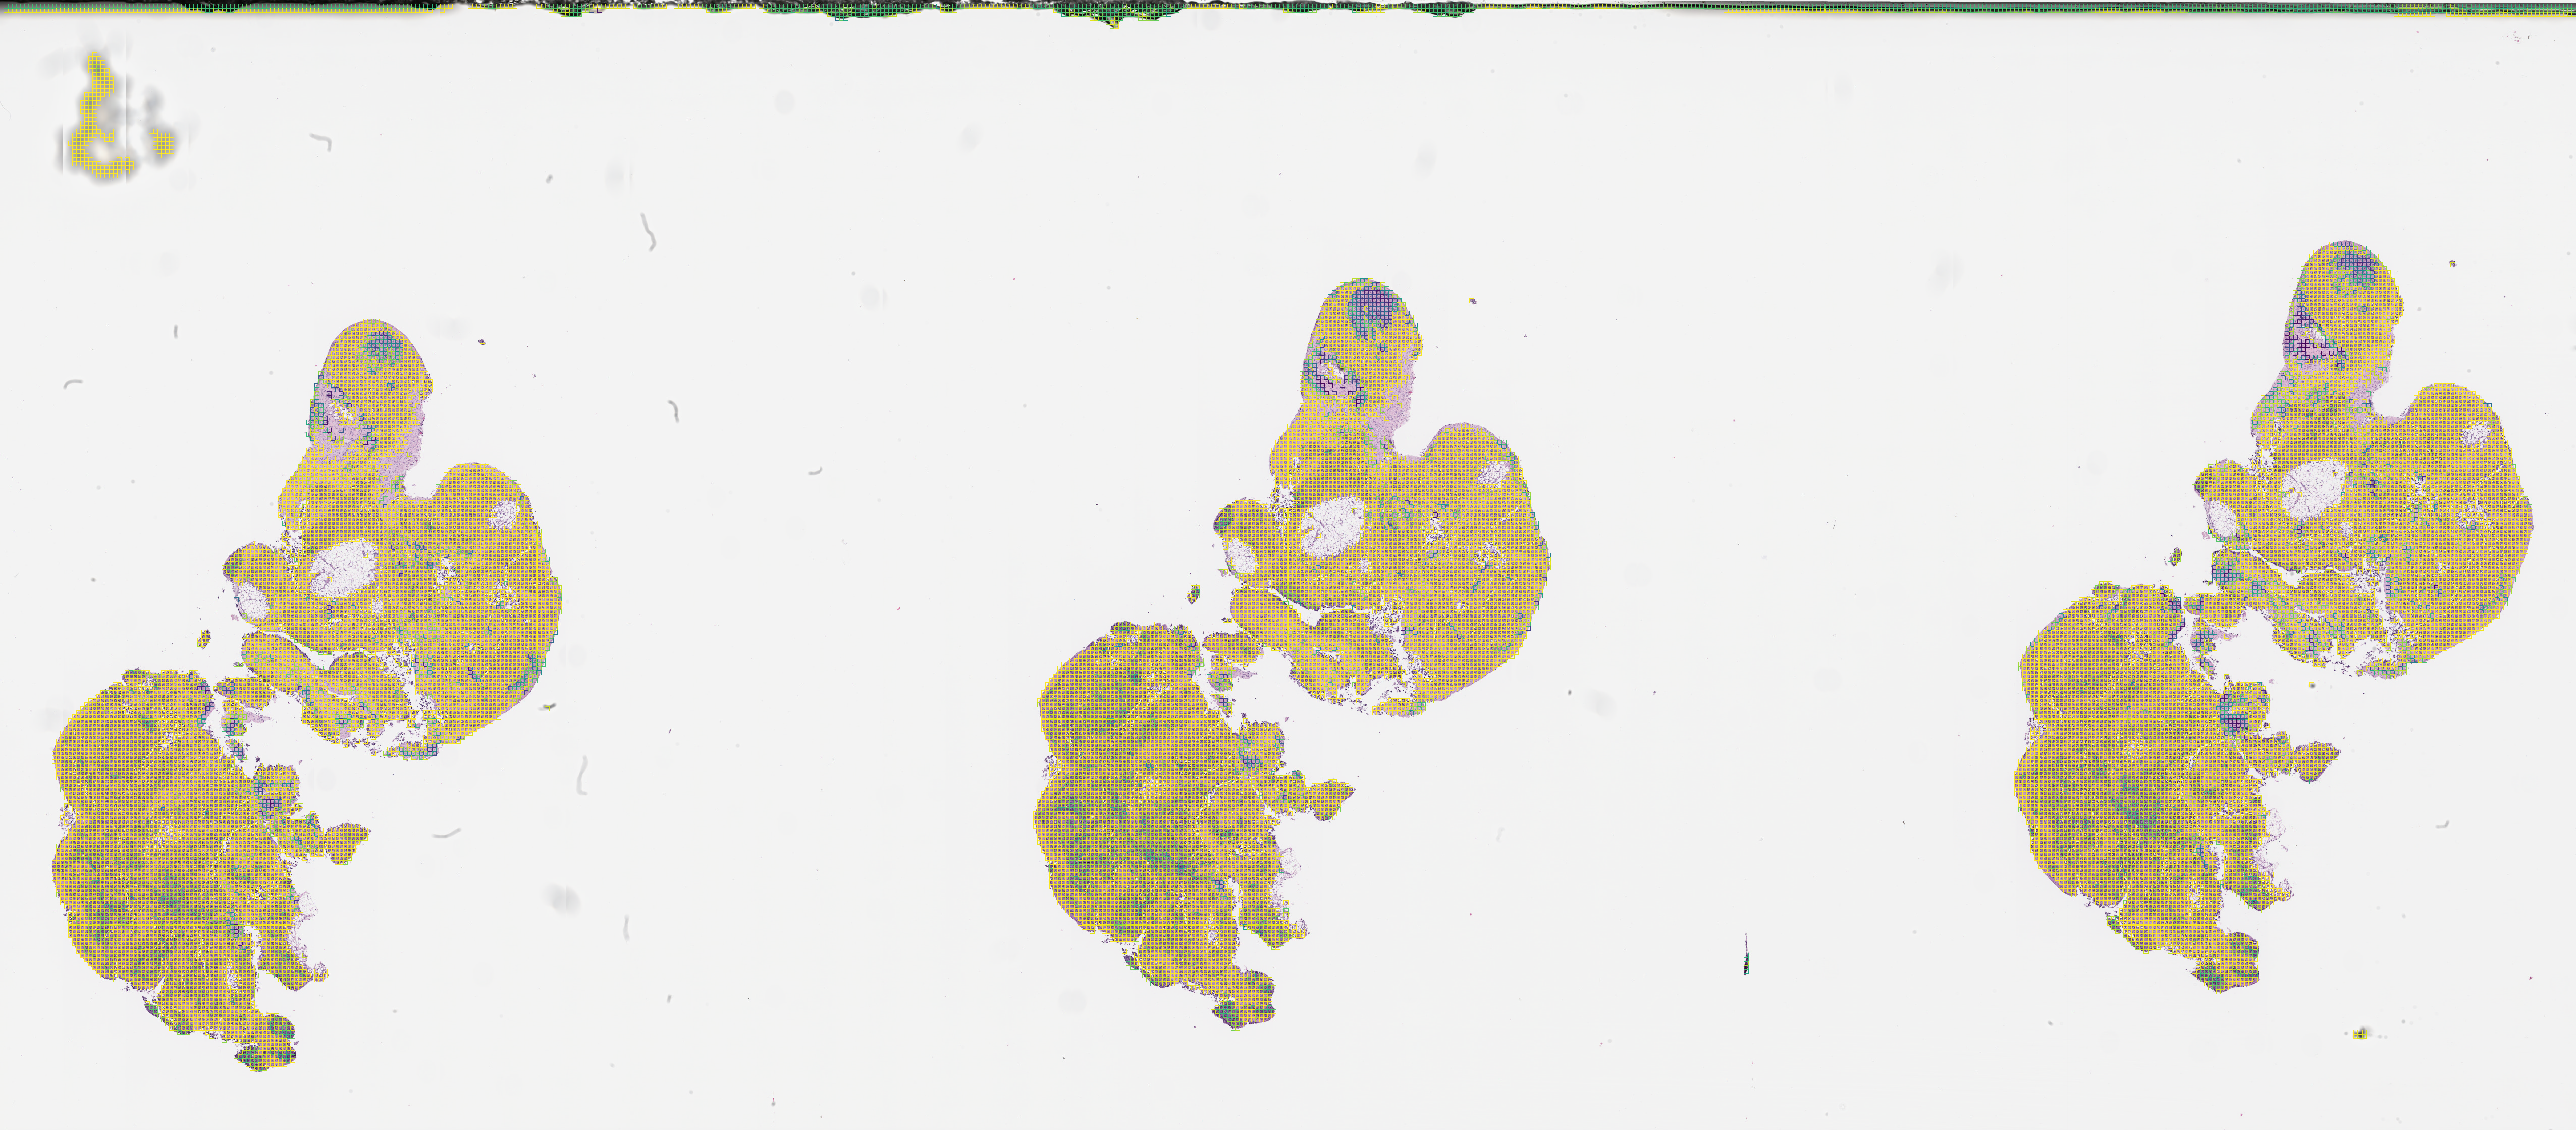

In [48]:
from IPython.display import Image

folder = 'PRO_12-123/tiles/2551129/visualize_infer_ov_clf/TileScores/data/'
Image(filename=folder + 'tile_scores_and_labels_visualization_tumor_score.png') 

Congratulations on completing the inference and visualization notebook! To view the end-to-end pipeline of the tiling workflow, please checkout the end-to-end notebook.